# Data Preprocessing 

In [ ]:
#Importing all relevant libraries
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go  
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Show data
df =pd.read_csv('data.csv')
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



(20037, 355)

In [ ]:
df.describe()
#gives count of answers,unique answers, most occuring answer and its frequency

Time from Start to Finish (seconds)     Q1     Q2     Q3  \
count                                 20037  20037  20037  20037   
unique                                 5168     12      6     56   
top                                     565  25-29    Man  India   
freq                                     34   4011  15789   5851   

                     Q4       Q5         Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
count             19570    19278      19121     15531      4278      7536   
unique                8       14          8         2         2         2   
top     Master’s degree  Student  3-5 years    Python         R       SQL   
freq               7859     5171       4546     15530      4277      7535   

        ...        Q35_B_Part_2 Q35_B_Part_3          Q35_B_Part_4  \
count   ...                1178          495                   431   
unique  ...                   2            2                     2   
top     ...   Weights & Biases     Comet.ml    Sacred + Omniboard    
freq    ...                1177          494                   430   

         Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
count            3200          558          481          847   
unique              2            2            2            2   
top      TensorBoard     Guild.ai     Polyaxon       Trains    
freq             3199          557          480          846   

                  Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
count                      520          3083         252  
unique                       2             2           2  
top      Domino Model Monitor           None       Other  
freq                       519          3082         251  

[4 rows x 355 columns]

In [ ]:
df.head()
#gives the top 5 rows

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

In [ ]:
#remove the top row as it contains only questions
#starting from the 1st row till last and including all columns
df_fin = df.iloc[1:,:]

In [ ]:
df_fin.head()

Time from Start to Finish (seconds)     Q1  ... Q35_B_Part_10 Q35_B_OTHER
1                                1838  35-39  ...           NaN         NaN
2                              289287  30-34  ...           NaN         NaN
3                                 860  35-39  ...          None         NaN
4                                 507  30-34  ...           NaN         NaN
5                                  78  30-34  ...           NaN         NaN

[5 rows x 355 columns]

In [ ]:
#To find out Null values in our data
df_fin.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

In [ ]:
#A dictionary for questions. Key is the Question number and value is a dataframe with the parts to the question
Questions = {}
#create list of questions 
qnums = list(dict.fromkeys([i.split('_')[0] for i in df_fin.columns]))  #split from _
qnums

['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39']

In [ ]:
#Separating out survey questions
for i in qnums:
    if i in ['Q1','Q2','Q3']: #so that all the questions that start with 1,2 or 3(like 10,20 or 30) dont go in Q1,2,3
        Questions[i] = df_fin[i] 
    else:
        Questions[i] = df_fin[[q for q in df_fin.columns if q.startswith(i)]]   


In [ ]:
#age
df_fin.Q1   

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1, Length: 20036, dtype: object

In [ ]:
#Q1 histogram using px to show different ages
fig = px.histogram(df_fin, x = 'Q1') 
fig.show()
# plotly express takes the data frame in as a parameter and you use other paramaters to manipulate the columns
#Most of the respondents are in age group 25-29

In [ ]:
#plotting a heatmap to show relation between age and experience of writing code
fig = px.density_heatmap(df_fin, x='Q1', y='Q6',category_orders={'Q1':['18-21','22-24','25-29','30-34','35-39','40-44','45-49'
,'50-54','55-59','60-69','70+'],'Q6':['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years'
,'20+ years']})
fig.show()

FEATURE ENGINEERING

In [ ]:
Questions['Q7']

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [ ]:
#renaming the columns with the languages it represent
Questions['Q7'].columns = list(Questions['Q7'].mode().values)
Questions['Q7']

Python    R  SQL    C  C++  Java  Javascript Julia Swift  Bash  MATLAB  \
1      Python    R  SQL    C  NaN   NaN  Javascript   NaN   NaN   NaN  MATLAB   
2      Python    R  SQL  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   
3         NaN  NaN  NaN  NaN  NaN  Java  Javascript   NaN   NaN  Bash     NaN   
4      Python  NaN  SQL  NaN  NaN   NaN         NaN   NaN   NaN  Bash     NaN   
5      Python  NaN  NaN  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   
...       ...  ...  ...  ...  ...   ...         ...   ...   ...   ...     ...   
20032     NaN  NaN  NaN  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   
20033  Python  NaN  NaN  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   
20034  Python  NaN  NaN  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   
20035  Python  NaN  SQL    C  NaN  Java  Javascript   NaN   NaN   NaN     NaN   
20036  Python  NaN  NaN  NaN  NaN   NaN         NaN   NaN   NaN   NaN     NaN   

      None  Other  
1      NaN  Other  
2      NaN    NaN  
3      NaN    NaN  
4      NaN    NaN  
5      NaN    NaN  
...    ...    ...  
20032  NaN    NaN  
20033  NaN    NaN  
20034  NaN    NaN  
20035  NaN    NaN  
20036  NaN    NaN  

[20036 rows x 13 columns]

In [ ]:
#reset the index and aggregate all the counts
q7 = Questions['Q7'].count().reset_index()
q7

level_0      0
0       Python  15530
1            R   4277
2          SQL   7535
3            C   3315
4          C++   3827
5         Java   3367
6   Javascript   2995
7        Julia    262
8        Swift    198
9         Bash   1776
10      MATLAB   2217
11        None    206
12       Other   1945

In [ ]:
#update column names
q7.columns = ['language','Count']
q7

language  Count
0       Python  15530
1            R   4277
2          SQL   7535
3            C   3315
4          C++   3827
5         Java   3367
6   Javascript   2995
7        Julia    262
8        Swift    198
9         Bash   1776
10      MATLAB   2217
11        None    206
12       Other   1945

In [ ]:
#bar graph to show the prevalence of different coding languages across the survey
q7 = q7.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q7.language, y = q7.Count)])
fig.show()

In [ ]:
#education across whole survey
edu = df_fin.Q4.value_counts()
edu

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [ ]:
#education graph
fig = go.Figure([go.Bar(x=edu.index, y=edu.values)])
fig.show()

In [ ]:
#renaming the columns with the ENVIRONMENT it represent
Questions['Q9'].columns = list(Questions['Q9'].mode().values)
Questions['Q9']

Jupyter (JupyterLab, Jupyter Notebooks, etc)    RStudio   ... None Other
1      Jupyter (JupyterLab, Jupyter Notebooks, etc)         NaN  ...  NaN   NaN
2                                                NaN        NaN  ...  NaN   NaN
3                                                NaN        NaN  ...  NaN   NaN
4                                                NaN        NaN  ...  NaN   NaN
5                                                NaN        NaN  ...  NaN   NaN
...                                              ...        ...  ...  ...   ...
20032                                            NaN        NaN  ...  NaN   NaN
20033  Jupyter (JupyterLab, Jupyter Notebooks, etc)    RStudio   ...  NaN   NaN
20034  Jupyter (JupyterLab, Jupyter Notebooks, etc)         NaN  ...  NaN   NaN
20035  Jupyter (JupyterLab, Jupyter Notebooks, etc)    RStudio   ...  NaN   NaN
20036  Jupyter (JupyterLab, Jupyter Notebooks, etc)         NaN  ...  NaN   NaN

[20036 rows x 12 columns]

In [ ]:
#reset the index and aggregate all the counts
q9 = Questions['Q9'].count().reset_index()
q9

level_0      0
0   Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
1                                        RStudio    3826
2                                   Visual Studio   2445
3                     Visual Studio Code (VSCode)   5873
4                                        PyCharm    5099
5                                        Spyder     3290
6                                     Notepad++     3132
7                                  Sublime Text     2452
8                                   Vim / Emacs     1502
9                                         MATLAB    1604
10                                           None    386
11                                          Other   1162

In [ ]:
#update column names
q9.columns = ['Env','Count']
q9

Env  Count
0   Jupyter (JupyterLab, Jupyter Notebooks, etc)   11211
1                                        RStudio    3826
2                                   Visual Studio   2445
3                     Visual Studio Code (VSCode)   5873
4                                        PyCharm    5099
5                                        Spyder     3290
6                                     Notepad++     3132
7                                  Sublime Text     2452
8                                   Vim / Emacs     1502
9                                         MATLAB    1604
10                                           None    386
11                                          Other   1162

In [ ]:
#PLOT A BAR GRAPH
q9 = q9.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q9.Env, y = q9.Count)])
fig.show()

In [ ]:
#renaming the columns with the NOTEBOOKS it represent
Questions['Q10'].columns = list(Questions['Q10'].mode().values)
#reset the index and aggregate all the counts
q10 = Questions['Q10'].count().reset_index()
#UPDATE COLUMN NAMES
q10.columns = ['Notebooks','Count']
#PLOT A BAR GRAPH 
q10 = q10.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q10.Notebooks, y = q10.Count)])
fig.show()

In [ ]:
#renaming the columns with the LIBRARIES it represent
Questions['Q14'].columns = list(Questions['Q14'].mode().values)
#reset the index and aggregate all the counts
q14 = Questions['Q14'].count().reset_index()
#UPDATE COLUMN NAMES
q14.columns = ['Libraries','Count']
#PLOT A BAR GRAPH 
q14 = q14.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q14.Libraries, y = q14.Count)])
fig.show()

In [ ]:
#renaming the columns with the CLOUD_PLATFORM it represent
Questions['Q26'].columns = list(Questions['Q26'].mode().values)
#reset the index and aggregate all the counts
q26 = Questions['Q26'].count().reset_index()
#UPDATE COLUMN NAMES
q26.columns = ['Cloud_Platform','Count']
#PLOT A BAR GRAPH
q26 = q26.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q26.Cloud_Platform, y = q26.Count)])
fig.show()

In [ ]:
#renaming the columns with the CLOUD_SERVICE it represent
Questions['Q27'].columns = list(Questions['Q27'].mode().values)
#reset the index and aggregate all the counts
q27 = Questions['Q27'].count().reset_index()
#UPDATE COLUMN NAMES
q27.columns = ['Cloud_Service','Count']
#PLOT A BAR GRAPH
q27 = q27.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q27.Cloud_Service, y = q27.Count)])
fig.show()

In [ ]:
#renaming the columns with the LEARNING PLATFORM it represent
Questions['Q37'].columns = list(Questions['Q37'].mode().values)
#reset the index and aggregate all the counts
q37 = Questions['Q37'].count().reset_index()
#UPDATE COLUMN NAMES
q37.columns = ['Learn_Platform','Count']
#PLOT A BAR GRAPH
q37 = q37.sort_values('Count', ascending = False)
fig = go.Figure([go.Bar(x = q37.Learn_Platform, y = q37.Count)])
fig.show()

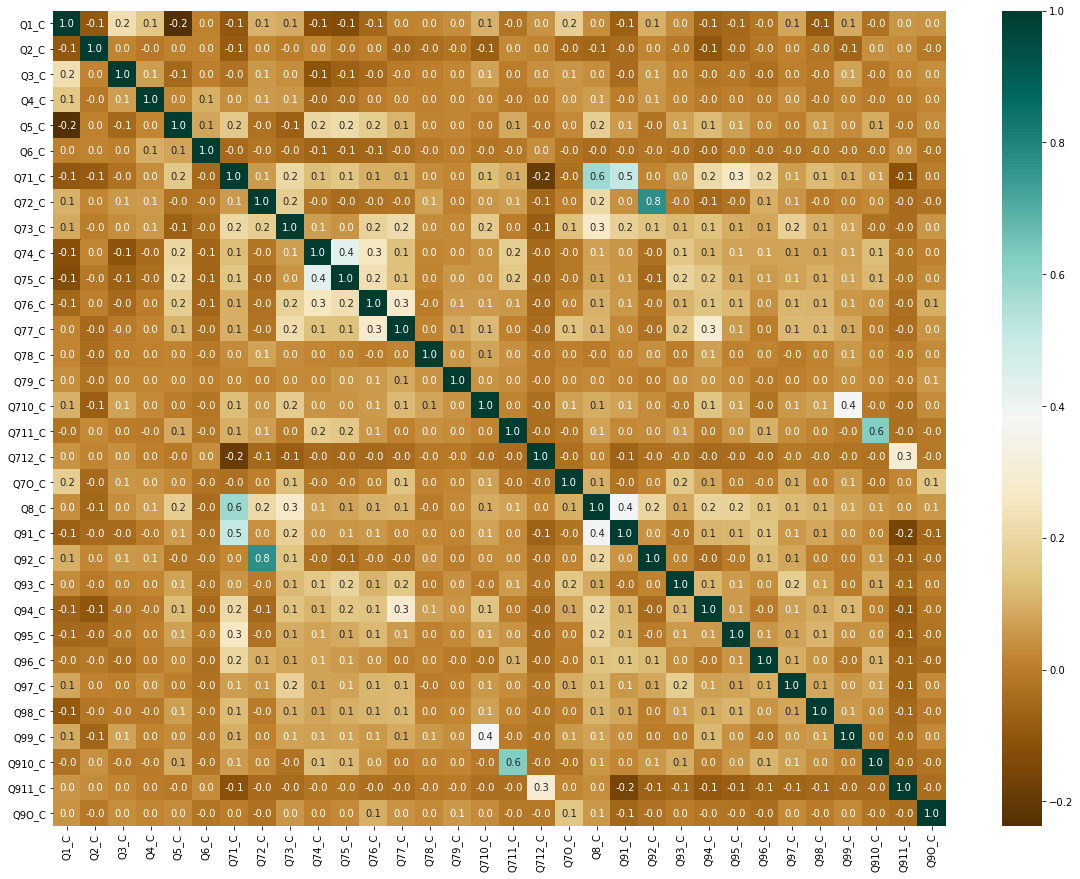

In [ ]:
#CREATE A NEW DATAFRAME AND NEW FEATURES AS CATEGORIAL DATA TYPE

df1=df_fin.copy()
df1['Q1_C']=df1['Q1'].astype('category').cat.codes
df1['Q2_C']=df1['Q2'].astype('category').cat.codes
df1['Q3_C']=df1['Q3'].astype('category').cat.codes
df1['Q4_C']=df1['Q4'].astype('category').cat.codes
df1['Q5_C']=df1['Q5'].astype('category').cat.codes
df1['Q6_C']=df1['Q6'].astype('category').cat.codes
df1['Q71_C']=df1['Q7_Part_1'].astype('category').cat.codes
df1['Q72_C']=df1['Q7_Part_2'].astype('category').cat.codes
df1['Q73_C']=df1['Q7_Part_3'].astype('category').cat.codes
df1['Q74_C']=df1['Q7_Part_4'].astype('category').cat.codes
df1['Q75_C']=df1['Q7_Part_5'].astype('category').cat.codes
df1['Q76_C']=df1['Q7_Part_6'].astype('category').cat.codes
df1['Q77_C']=df1['Q7_Part_7'].astype('category').cat.codes
df1['Q78_C']=df1['Q7_Part_8'].astype('category').cat.codes
df1['Q79_C']=df1['Q7_Part_9'].astype('category').cat.codes
df1['Q710_C']=df1['Q7_Part_10'].astype('category').cat.codes
df1['Q711_C']=df1['Q7_Part_11'].astype('category').cat.codes
df1['Q712_C']=df1['Q7_Part_12'].astype('category').cat.codes
df1['Q7O_C']=df1['Q7_OTHER'].astype('category').cat.codes
df1['Q8_C']=df1['Q8'].astype('category').cat.codes
df1['Q91_C']=df1['Q9_Part_1'].astype('category').cat.codes
df1['Q92_C']=df1['Q9_Part_2'].astype('category').cat.codes
df1['Q93_C']=df1['Q9_Part_3'].astype('category').cat.codes
df1['Q94_C']=df1['Q9_Part_4'].astype('category').cat.codes
df1['Q95_C']=df1['Q9_Part_5'].astype('category').cat.codes
df1['Q96_C']=df1['Q9_Part_6'].astype('category').cat.codes
df1['Q97_C']=df1['Q9_Part_7'].astype('category').cat.codes
df1['Q98_C']=df1['Q9_Part_8'].astype('category').cat.codes
df1['Q99_C']=df1['Q9_Part_9'].astype('category').cat.codes
df1['Q910_C']=df1['Q9_Part_10'].astype('category').cat.codes
df1['Q911_C']=df1['Q9_Part_11'].astype('category').cat.codes
df1['Q9O_C']=df1['Q9_OTHER'].astype('category').cat.codes

#PLOT HEATMAP TO STUDY CORRELATION WITH Q5
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True,fmt='.1f',cmap="BrBG")
plt.show()


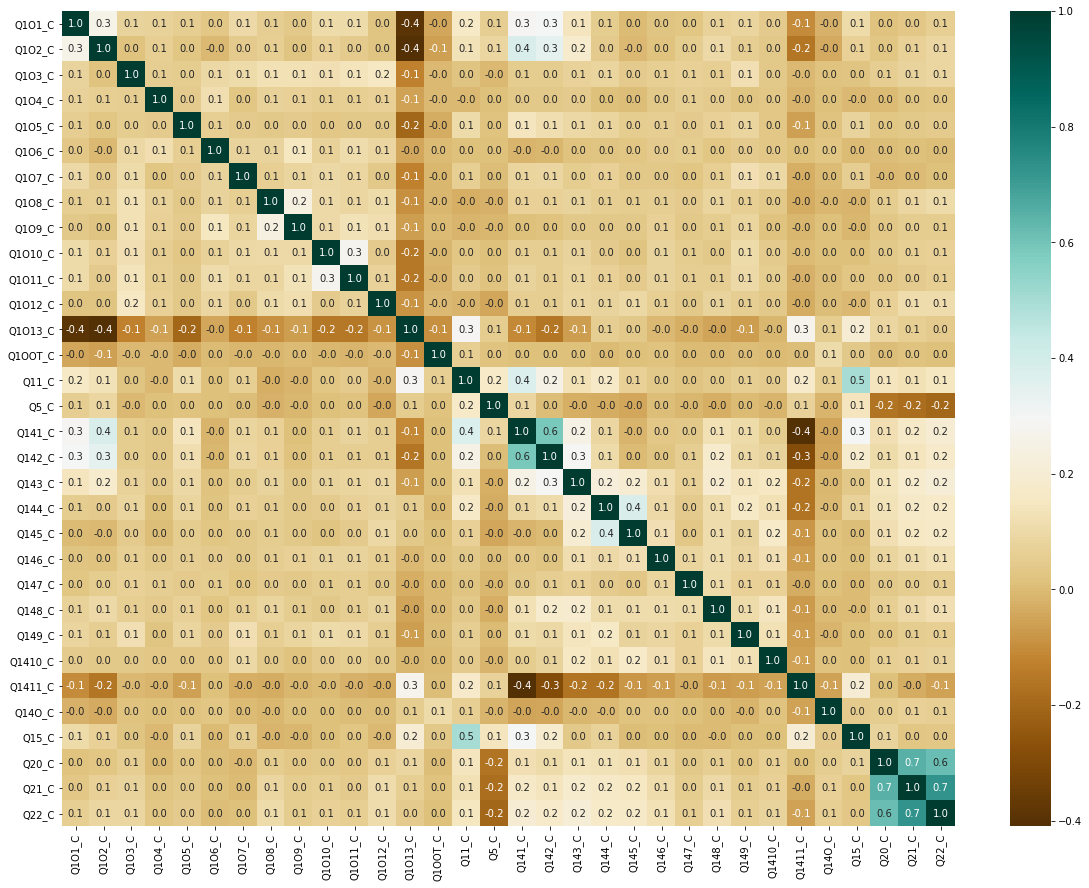

In [ ]:
#CREATE A NEW DATAFRAME AND NEW FEATURES AS CATEGORIAL DATA TYPE

df2=df_fin.copy()

df2['Q1O1_C']=df2['Q10_Part_1'].astype('category').cat.codes
df2['Q1O2_C']=df2['Q10_Part_2'].astype('category').cat.codes
df2['Q1O3_C']=df2['Q10_Part_3'].astype('category').cat.codes
df2['Q1O4_C']=df2['Q10_Part_4'].astype('category').cat.codes
df2['Q1O5_C']=df2['Q10_Part_5'].astype('category').cat.codes
df2['Q1O6_C']=df2['Q10_Part_6'].astype('category').cat.codes
df2['Q1O7_C']=df2['Q10_Part_7'].astype('category').cat.codes
df2['Q1O8_C']=df2['Q10_Part_8'].astype('category').cat.codes
df2['Q1O9_C']=df2['Q10_Part_9'].astype('category').cat.codes
df2['Q1O10_C']=df2['Q10_Part_10'].astype('category').cat.codes
df2['Q1O11_C']=df2['Q10_Part_11'].astype('category').cat.codes
df2['Q1O12_C']=df2['Q10_Part_12'].astype('category').cat.codes
df2['Q1O13_C']=df2['Q10_Part_13'].astype('category').cat.codes
df2['Q1OOT_C']=df2['Q10_OTHER'].astype('category').cat.codes
df2['Q11_C']=df2['Q11'].astype('category').cat.codes
df2['Q5_C']=df2['Q5'].astype('category').cat.codes
df2['Q141_C']=df2['Q14_Part_1'].astype('category').cat.codes
df2['Q142_C']=df2['Q14_Part_2'].astype('category').cat.codes
df2['Q143_C']=df2['Q14_Part_3'].astype('category').cat.codes
df2['Q144_C']=df2['Q14_Part_4'].astype('category').cat.codes
df2['Q145_C']=df2['Q14_Part_5'].astype('category').cat.codes
df2['Q146_C']=df2['Q14_Part_6'].astype('category').cat.codes
df2['Q147_C']=df2['Q14_Part_7'].astype('category').cat.codes
df2['Q148_C']=df2['Q14_Part_8'].astype('category').cat.codes
df2['Q149_C']=df2['Q14_Part_9'].astype('category').cat.codes
df2['Q1410_C']=df2['Q14_Part_10'].astype('category').cat.codes
df2['Q1411_C']=df2['Q14_Part_11'].astype('category').cat.codes
df2['Q14O_C']=df2['Q14_OTHER'].astype('category').cat.codes
df2['Q15_C']=df2['Q15'].astype('category').cat.codes
df2['Q20_C']=df2['Q20'].astype('category').cat.codes
df2['Q21_C']=df2['Q21'].astype('category').cat.codes
df2['Q22_C']=df2['Q22'].astype('category').cat.codes

#PLOT HEATMAP TO STUDY CORRELATION
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df2.corr(),annot=True,fmt='.1f',cmap="BrBG")
plt.show()

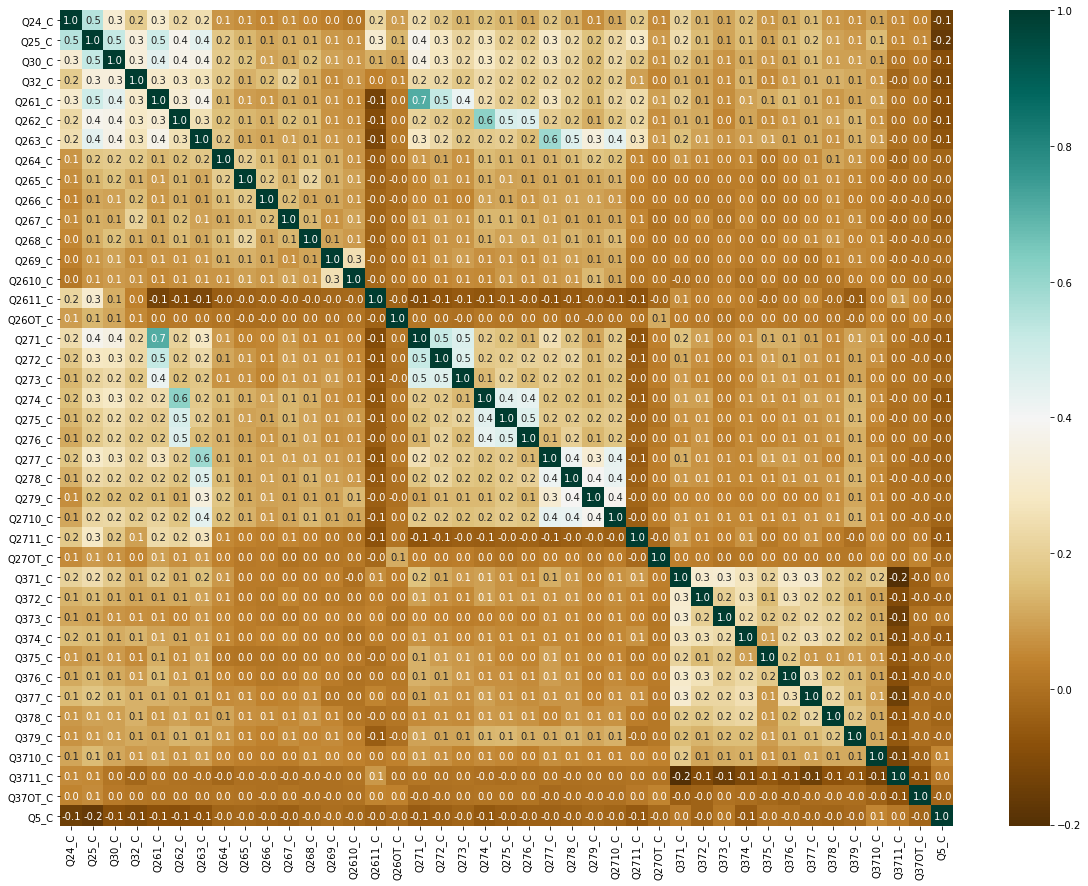

In [ ]:
#CREATE A NEW DATAFRAME AND NEW FEATURES AS CATEGORIAL DATA TYPE
df3=df_fin.copy()
df3['Q24_C']=df3['Q24'].astype('category').cat.codes
df3['Q25_C']=df3['Q25'].astype('category').cat.codes
df3['Q30_C']=df3['Q30'].astype('category').cat.codes
df3['Q32_C']=df3['Q32'].astype('category').cat.codes
df3['Q261_C']=df3['Q26_A_Part_1'].astype('category').cat.codes
df3['Q262_C']=df3['Q26_A_Part_2'].astype('category').cat.codes
df3['Q263_C']=df3['Q26_A_Part_3'].astype('category').cat.codes
df3['Q264_C']=df3['Q26_A_Part_4'].astype('category').cat.codes
df3['Q265_C']=df3['Q26_A_Part_5'].astype('category').cat.codes
df3['Q266_C']=df3['Q26_A_Part_6'].astype('category').cat.codes
df3['Q267_C']=df3['Q26_A_Part_7'].astype('category').cat.codes
df3['Q268_C']=df3['Q26_A_Part_8'].astype('category').cat.codes
df3['Q269_C']=df3['Q26_A_Part_9'].astype('category').cat.codes
df3['Q2610_C']=df3['Q26_A_Part_10'].astype('category').cat.codes
df3['Q2611_C']=df3['Q26_A_Part_11'].astype('category').cat.codes
df3['Q26OT_C']=df3['Q26_A_OTHER'].astype('category').cat.codes
df3['Q271_C']=df3['Q27_A_Part_1'].astype('category').cat.codes
df3['Q272_C']=df3['Q27_A_Part_2'].astype('category').cat.codes
df3['Q273_C']=df3['Q27_A_Part_3'].astype('category').cat.codes
df3['Q274_C']=df3['Q27_A_Part_4'].astype('category').cat.codes
df3['Q275_C']=df3['Q27_A_Part_5'].astype('category').cat.codes
df3['Q276_C']=df3['Q27_A_Part_6'].astype('category').cat.codes
df3['Q277_C']=df3['Q27_A_Part_7'].astype('category').cat.codes
df3['Q278_C']=df3['Q27_A_Part_8'].astype('category').cat.codes
df3['Q279_C']=df3['Q27_A_Part_9'].astype('category').cat.codes
df3['Q2710_C']=df3['Q27_A_Part_10'].astype('category').cat.codes
df3['Q2711_C']=df3['Q27_A_Part_11'].astype('category').cat.codes
df3['Q27OT_C']=df3['Q27_A_OTHER'].astype('category').cat.codes
df3['Q371_C']=df3['Q37_Part_1'].astype('category').cat.codes
df3['Q372_C']=df3['Q37_Part_2'].astype('category').cat.codes
df3['Q373_C']=df3['Q37_Part_3'].astype('category').cat.codes
df3['Q374_C']=df3['Q37_Part_4'].astype('category').cat.codes
df3['Q375_C']=df3['Q37_Part_5'].astype('category').cat.codes
df3['Q376_C']=df3['Q37_Part_6'].astype('category').cat.codes
df3['Q377_C']=df3['Q37_Part_7'].astype('category').cat.codes
df3['Q378_C']=df3['Q37_Part_8'].astype('category').cat.codes
df3['Q379_C']=df3['Q37_Part_9'].astype('category').cat.codes
df3['Q3710_C']=df3['Q37_Part_10'].astype('category').cat.codes
df3['Q3711_C']=df3['Q37_Part_11'].astype('category').cat.codes
df3['Q37OT_C']=df3['Q37_OTHER'].astype('category').cat.codes
df3['Q5_C']=df3['Q5'].astype('category').cat.codes

#HEATMAP TO THE DATAFRAME 3 FOR CORRELATION IDENTIFICATION
f,ax=plt.subplots(figsize=(20,15))
sns.heatmap(df3.corr(),annot=True,fmt='.1f',cmap="BrBG")
plt.show()



# Association Rule Mining

In [ ]:
#importing libraries
from termcolor import colored #to output colored text to the terminal
import numpy as np
import pandas as pd
from apyori import apriori

In [ ]:
#reading data
data = pd.read_csv(r"C:\Users\Vinod Kumar\Desktop\College\Sem 2\PBL\kaggle_survey_2020_responses.csv",header=1)

In [ ]:
product_data = data.loc[:, pd.Series(data.columns)[(pd.Series(data.columns).str.contains('- Selected Choice -',regex=False)) & \
                                         (pd.Series(data.columns).str.contains('(None$)|(Other$)|activities|courses|(media sources)|(you hope)',regex=True)==False)]].copy()

C:\Users\Vinod Kumar\Jupyter\lib\site-packages\pandas\core\strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [ ]:
dupes = pd.DataFrame()
for i in product_data.columns:
    dupes = dupes.append(pd.DataFrame({"Duplicate":pd.Series(product_data.loc[:,i].dropna().unique()).apply(lambda x: x.strip()),"Column Name":i}))
    
dupes[dupes.duplicated(subset="Duplicate")]

Duplicate                                        Column Name
0    MATLAB  Which of the following integrated development ...
0     Shiny  Where do you publicly share or deploy your dat...

In [ ]:
product_data.columns = range(len(product_data.columns))

In [ ]:
dupes = pd.DataFrame()
for i in product_data.columns:
    dupes = dupes.append(pd.DataFrame({"Duplicate":pd.Series(product_data.loc[:,i].dropna().unique()).apply(lambda x: x.strip()),"Column Name":i}))
    
dupes[dupes.duplicated(subset="Duplicate")]

Duplicate  Column Name
0    MATLAB           20
0     Shiny          168

In [ ]:
product_data.iloc[:,20] = product_data.iloc[:,20].str.replace("MATLAB","MATLAB IDE",regex=False)
product_data.iloc[:,168] = product_data.iloc[:,168].str.replace("Shiny","Shiny (Publicly share)",regex=False)
product_data.fillna('',inplace=True)

In [ ]:
#first 5 records
product_data.head()

0   1    2   3   4     5           6   7   8     9       10   \
0  Python   R  SQL   C            Javascript                MATLAB   
1  Python   R  SQL                                                   
2                           Java  Javascript          Bash           
3  Python      SQL                                    Bash           
4  Python                                                            

                                             11  12             13   \
0  Jupyter (JupyterLab, Jupyter Notebooks, etc)                       
1                                                     Visual Studio   
2                                                                     
3                                                                     
4                                                                     

                           14         15          16             17   \
0  Visual Studio Code (VSCode)               Spyder                    
1                                PyCharm                               
2  Visual Studio Code (VSCode)                           Notepad++     
3                                PyCharm                               
4                                                                      

                18               19  20                 21               22   \
0                                          Kaggle Notebooks  Colab Notebooks   
1    Sublime Text                                            Colab Notebooks   
2    Sublime Text      Vim / Emacs                                             
3                                                                              
4                                                                              

  23  24  25  26  27  28  29  30  31  32    33  34            35         36   \
0                                          GPUs       Matplotlib               
1                                          GPUs       Matplotlib    Seaborn    
2                                                                              
3                                                     Matplotlib    Seaborn    
4                                                                              

                         37                  38       39       40  41  42   \
0                                                                            
1                              Ggplot / ggplot2    Shiny                     
2                                                           D3 js            
3   Plotly / Plotly Express                                                  
4                                                                            

            43  44               45             46       47         48  49   \
0   Geoplotlib                          TensorFlow    Keras                   
1                      Scikit-learn     TensorFlow    Keras    PyTorch        
2                                                                             
3                      Scikit-learn     TensorFlow    Keras                   
4                                                                             

  50         51  52  53  54  55  56  57  58                             59   \
0       Xgboost                                                               
1                                             Linear or Logistic Regression   
2                                                                             
3       Xgboost                               Linear or Logistic Regression   
4                                                                             

                                60   \
0  Decision Trees or Random Forests   
1                                     
2                                     
3  Decision Trees or Random Forests   
4                                     

                                                 61                   62  63   \
0  Gradient Boosting Machine

In [ ]:
product_list = list()
for t in range(len(product_data)):
    product_list.append([str(product_data.values[t,c]) for c in range(product_data.shape[1]) if str(product_data.values[t,c])!=''])

In [ ]:
len(product_list)

20036

In [ ]:
print(product_list[0])

['Python', 'R', 'SQL', 'C', 'Javascript', 'MATLAB', 'Jupyter (JupyterLab, Jupyter Notebooks, etc) ', 'Visual Studio Code (VSCode)', '  Spyder  ', ' Kaggle Notebooks', 'Colab Notebooks', 'GPUs', ' Matplotlib ', ' Geoplotlib ', '  TensorFlow ', ' Keras ', ' Xgboost ', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Recurrent Neural Networks', 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)', 'Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Contextualized embeddings (ELMo, CoVe)', 'Transformer language models (GPT-3, BERT, XLnet, etc)']


In [ ]:
MIN_SUPPORT = 0.02
MIN_CONFIDENCE = 0.6
MIN_LIFT = 3
MAX_LENGTH = 2

rules = apriori(product_list,min_support=MIN_SUPPORT,min_confidence=MIN_CONFIDENCE,min_lift=MIN_LIFT,max_length=MAX_LENGTH)
rules = list(rules)

rules_df = pd.DataFrame()
for i in range(len(rules)):
    rules_df = rules_df.append(pd.DataFrame({"Antecedent": (list(rules[i][2][0][0])[0]).strip(),
                               "Consequent": (list(rules[i][2][0][1])[0]).strip(),
                               "Support": np.round(float(list(rules[i])[1]),3),
                               "Confidence": np.round(float(list(rules[i])[2][0][2]),3),
                               "Lift": np.round(float(list(rules[i])[2][0][3]),3)},index=[i]))
    
    
rules_df = rules_df.loc[(rules_df["Consequent"]!='') & (rules_df["Antecedent"]!='')].sort_values(by=["Lift","Confidence"],ascending=[False,False]).drop_duplicates().reset_index(drop=True).copy()

rules_df.head(10)

Antecedent  \
0                                       Auto-Sklearn   
1                    Generative Adversarial Networks   
2  Google Cloud AI Platform / Google Cloud ML Engine   
3            Transformer Networks (BERT, gpt-3, etc)   
4                                    Azure Functions   
5                Microsoft Azure Container Instances   
6                               Azure Cloud Services   
7                      Azure Machine Learning Studio   
8                   Amazon Elastic Container Service   
9                                   Amazon SageMaker   

                                          Consequent  Support  Confidence  \
0  Automated model selection (e.g. auto-sklearn, ...    0.021       0.710   
1                Generative Networks (GAN, VAE, etc)    0.035       0.692   
2                        Google Cloud Compute Engine    0.022       0.612   
3  Transformer language models (GPT-3, BERT, XLne...    0.053       0.817   
4                                    Microsoft Azure    0.021       0.926   
5                                    Microsoft Azure    0.023       0.911   
6                                    Microsoft Azure    0.038       0.900   
7                                    Microsoft Azure    0.024       0.876   
8                                         Amazon EC2    0.025       0.802   
9                                         Amazon EC2    0.023       0.740   

     Lift  
0  17.445  
1  12.704  
2  12.085  
3  11.458  
4  10.887  
5  10.704  
6  10.571  
7  10.299  
8   9.728  
9   8.983

In [ ]:
rules_df.sort_values(by='Confidence',ascending=False,inplace = True)
n = 1
for i in range(len(rules_df)):
    if (rules_df.iloc[i,3]*100) < 70:
        break
    print(f'{n}. {colored(np.round(rules_df.iloc[i,3]*100,1),"grey","on_cyan")}{colored("%","grey","on_cyan")} of the respondents who use {colored(rules_df.iloc[i,0],"grey","on_cyan")} also use {colored(rules_df.iloc[i,1],"grey","on_cyan")}\n')
    n += 1

1. 98.8% of the respondents who use Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc) also use Convolutional Neural Networks

2. 98.7% of the respondents who use Image segmentation methods (U-Net, Mask R-CNN, etc) also use Convolutional Neural Networks

3. 98.6% of the respondents who use General purpose image/video tools (PIL, cv2, skimage, etc) also use Convolutional Neural Networks

4. 98.5% of the respondents who use Object detection methods (YOLOv3, RetinaNet, etc) also use Convolutional Neural Networks

5. 96.9% of the respondents who use Amazon Elastic Container Service also use Amazon Web Services (AWS)

6. 96.1% of the respondents who use Amazon EC2 also use Amazon Web Services (AWS)

7. 95.9% of the respondents who use Amazon SageMaker also use Amazon Web Services (AWS)

8. 95.6% of the respondents who use AWS Lambda also use Amazon Web Services (AWS)

9. 94.8% of the respondents who use Generative Networks (G

# There are a few interesting findings like:
1) 78.6 % of Respondents having personal blog also use Github.
2) 78.2% of Respondents using Kaggle also use Github.

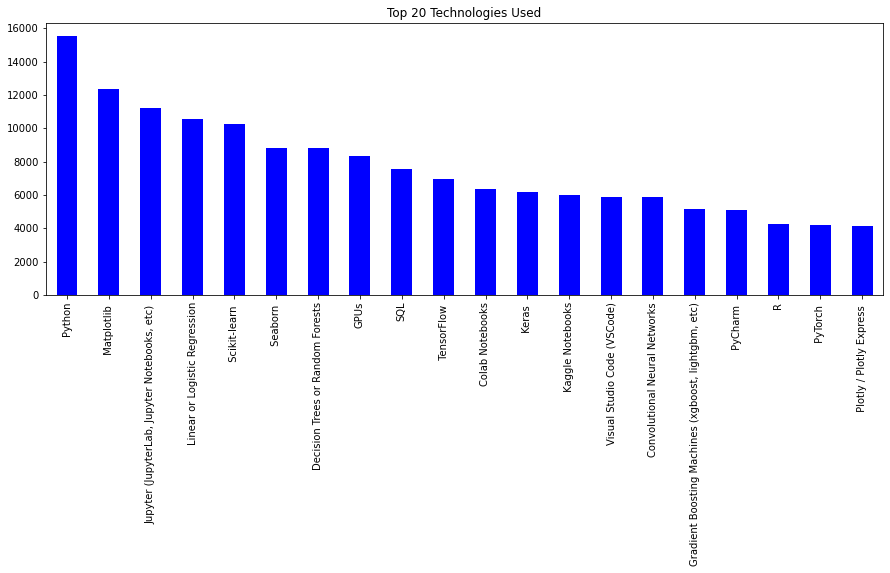

In [ ]:
#Let's look at the top 20 technologies used by the respondents
prod_arr = pd.Series(product_data.values.flatten())
prod_arr = prod_arr[prod_arr != ''].copy()
(prod_arr.value_counts()).iloc[:20].plot(kind='bar',figsize=(15,5),title="Top 20 Technologies Used",color='blue');